# CaBER Image Sequence Processing

In [2]:
import sys
sys.path.append('../')
import time

In [3]:
from image_sequence import ImageSequence # In your own code, change to: "from caber_image_processing import ImageSequence"

In this example script, the processing of multiple CaBER experiment images is shown. A single image can be processed to find the minimum radius at that time. Multiple images over the span of an experiment show the evolution of the minimum radius with time, which can be used to analyze the behavior of the fluid. To begin, designate a folder of sequenced images. These images must be named in numerical order with progressing time. A folder like this would be created if the frames are processed as a video.

In [4]:
# Set path to folder of images
folder_path = '../data/sample_frames' # Must contain images in numerical order

A sequence of images is processed just like images would be separately. This means there are similar input/configuration parameters for an image sequence as their are for images. In this example we will explore just a few. Detailed explanation of other parameters can be found in the library's documentation.

By default, the user will be prompted to crop their image to the exact width the fluid. The width of this crop should be provided in meters (all inputs should be in SI units). The degree of the polynomial edge approximation can also be changed but is defaulted to 4. To create this polynomial, only the middle 40% of the edge points is used. This percentage can be expanded too.

In [5]:
polynomial_degree = 4 # For edge approximation
crop_width = 6*(10**(-3)) # Must be in meters (all inputs should be standard SI units)
vertical_percentage_to_consider = 0.4 # Middle percentage of picture height to consider, should contain the necessary part of the fluid (where a minimum radius may be)

When the ImageSequence object is created, each frame is processed simultaneously to speed the process. In a matter of seconds, the minimum radius and other image attributes are extracted from every frame.

In [7]:
# Construct image sequence object and get radii
start = time.time()
image_seq = ImageSequence(folder_path, width=crop_width)
end = time.time()
print('Analyzed ' + str(len(image_seq.images)) + ' frames in ' + str(end - start) + ' seconds')

Analyzed 923 frames in 15.075139045715332 seconds


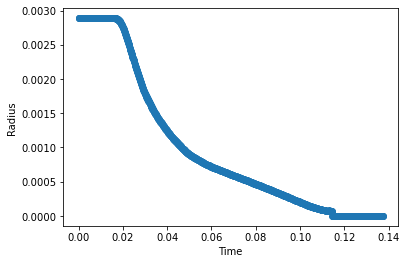

In [8]:
# Plot data over time
time_btwn_frames = 0.149*10**(-3) # In seconds
image_seq.plot_radius(time_btwn_frames) # Time in seconds

As you can see, the radius decreases with time until reaching a breaking point where the radius is zero. This data can be fit to an equation to gain information about the behavior of the fluid. See the video_processing script for a walkthrough example of this process. The ImageSequence class has the same fit method as the Video class.